In [2]:
import folium
import geopandas
import matplotlib
import matplotlib.pyplot as plt
import contextily as ctx
from shapely.geometry import Point
import pandas as pd

In [3]:
londrina = geopandas.read_file('shapefile/bairros/LIM_Bairros_V1.shp')

In [20]:
lojas = pd.read_csv('Dados/coordenadas.csv')
lista = []
for index, loja in lojas.iterrows():
    if loja['Longitude'] == 0.00000 or loja['Longitude'] < -51.35:
        lista.append(Point(0,0))
        continue
    lista.append(Point(loja['Longitude'],loja['Latitude']))
plista = pd.DataFrame(lista)
glista = geopandas.GeoSeries(lista)

In [21]:
lojasLondrina = geopandas.GeoDataFrame(list_of_floats, geometry=glista)

In [22]:
lojasLondrina

,0,geometry
0,26.0,POINT (-51.18442 -23.29995)
1,235.0,POINT (-51.13779 -23.35333)
2,317.0,POINT (-51.16904 -23.30120)
3,150.0,POINT (-51.14429 -23.25820)
4,12.0,POINT (-51.18892 -23.34483)
...,...,...
201,11.0,POINT (-51.17267 -23.27995)
202,11.0,POINT (0.00000 0.00000)
203,3.0,POINT (-51.16667 -23.34508)
204,3.0,POINT (0.00000 0.00000)


In [23]:
def add_basemap(ax, zoom, url='http://tile.stamen.com/terrain/tileZ/tileX/tileY.png'):
    xmin, xmax, ymin, ymax = ax.axis()
    basemap, extent = ctx.bounds2img(xmin, ymin, xmax, ymax, zoom=zoom, url=url)
    ax.imshow(basemap, extent=extent, interpolation='bilinear')
    # restore original x/y limits
    ax.axis((xmin, xmax, ymin, ymax))

In [24]:
lojas['Nome']

0                                           Espaço Smart
1            Depósito Roseira - Construção e Acabamentos
2                                    Depósito São Marcos
3            Depósito Alvorada - Materiais de Construção
4                          Gol Materiais Para Construção
                             ...                        
201                                Madeireira Casa Verde
202                                Madeireira Casa Verde
203    BUNKER - LOCAÇÃO CONTAINER LONDRINA, obras, re...
204    BUNKER - LOCAÇÃO CONTAINER LONDRINA, obras, re...
205    LONDRINA TINTAS Lojas de Tintas Texturas e Gra...
Name: Nome, Length: 206, dtype: object

In [25]:
lojas['Classificação'] = lojas['Classificação'].str.strip('()')
#map(float, lojas['Classificação'])
lojas.fillna(0, inplace=True)
list_of_floats = []

for item in lojas['Classificação'] :

    list_of_floats.append(float(item))

In [26]:
def Nmaxelements(list1,listPoints, N): 
    final_list = [] 
    listaPointsF = []
    index = 0
    for i in range(0, N):  
        max1 = 0
          
        for j in range(len(list1)):      
            if list1[j] > max1: 
                max1 = list1[j]; 
                index = j
                  
        list1.remove(max1); 
        final_list.append(max1) 
        listaPointsF.append(listPoints[index])
    return geopandas.GeoDataFrame(final_list, geometry=listaPointsF) 

In [27]:
retailMx = Nmaxelements(list1=listaFloat,listPoints=g2lista, N=20)

In [28]:
index = 0
g2lista = []
listaFloat = []
for item in glista:
    if item.x != 0.0:
        g2lista.append(item)
        listaFloat.append(list_of_floats[index])  
    index+=1

In [29]:
df = list_of_floats
dh = glista
uh = []
uf = []
index = 0
for item in glista:
    if item.x != 0:
        uh.append(item)
        uf.append(list_of_floats[index])
    index+=1


In [30]:
lojasLondrina2 = geopandas.GeoDataFrame(uf, geometry=uh)

In [31]:
classificPos = []
index = 0
for i in range(100,5000,150):
    classificPos.insert(0,i)
    index +=1
    if index == 19:
        break

In [32]:
len(classificPos)

19

In [33]:
retailMx

,0,geometry
0,847.0,POINT (-51.20242 -23.29621)
1,725.0,POINT (-51.18479 -23.30045)
2,410.0,POINT (-51.14354 -23.31245)
3,317.0,POINT (-51.16904 -23.30120)
4,299.0,POINT (-51.17042 -23.29846)
5,280.0,POINT (-51.15654 -23.31270)
6,280.0,POINT (-51.14679 -23.31658)
7,274.0,POINT (-51.16404 -23.35145)
8,235.0,POINT (-51.13779 -23.35333)
9,235.0,POINT (-51.14167 -23.36733)


In [39]:
retailMx

,0,geometry
0,847.0,POINT (-51.20242 -23.29621)
1,725.0,POINT (-51.18479 -23.30045)
2,410.0,POINT (-51.14354 -23.31245)
3,317.0,POINT (-51.16904 -23.30120)
4,299.0,POINT (-51.17042 -23.29846)
5,280.0,POINT (-51.15654 -23.31270)
6,280.0,POINT (-51.14679 -23.31658)
7,274.0,POINT (-51.16404 -23.35145)
8,235.0,POINT (-51.13779 -23.35333)
9,235.0,POINT (-51.14167 -23.36733)


/home/renan/anaconda3/envs/py3/lib/python3.8/site-packages/pyproj/crs.py:77: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method.
  return _prepare_from_string(" ".join(pjargs))
<ipython-input-45-b589440659ee>:11: FutureWarning: The "contextily.tile_providers" module is deprecated and will be removed in contextily v1.1. Please use "contextily.providers" instead.
  ctx.add_basemap(ax,url=ctx.sources.ST_TERRAIN)
<ipython-input-45-b589440659ee>:11: FutureWarning: The "url" option is deprecated. Please use the "source" argument instead.
  ctx.add_basemap(ax,url=ctx.sources.ST_TERRAIN)


HTTPError: Tile URL resulted in a 404 error. Double-check your tile url:
http://tile.stamen.com/terrain/14/5861/9286.png

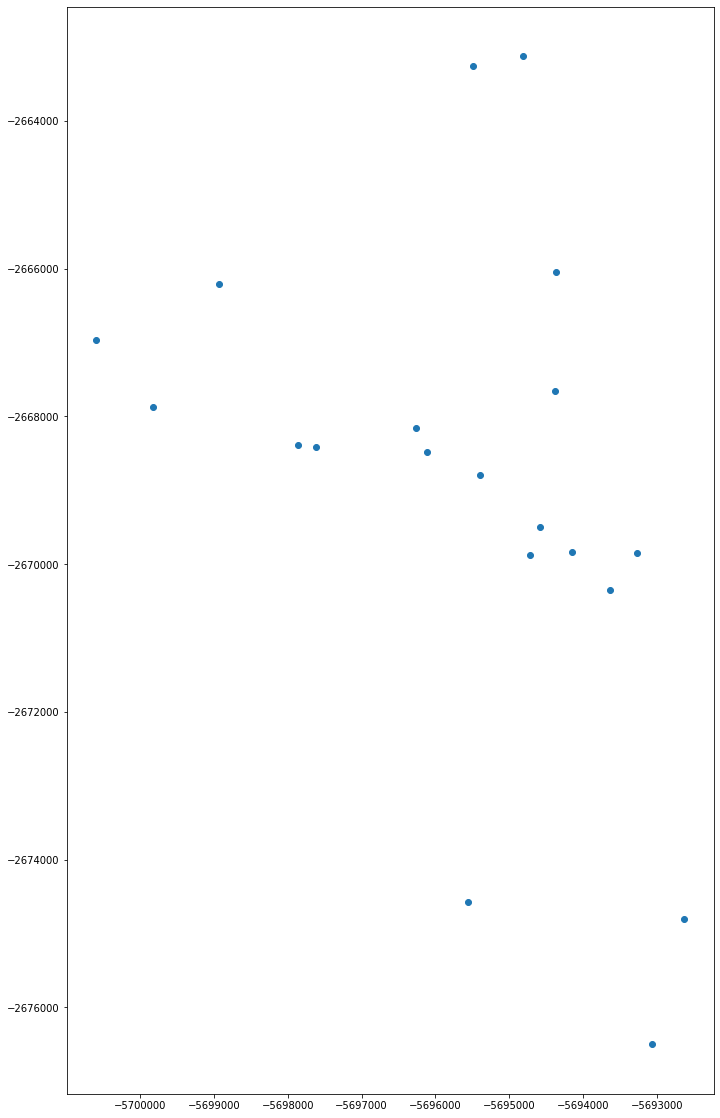

In [45]:
from geopandas import GeoDataFrame

#gdf = GeoDataFrame(glista, crs= {"init": "epsg:3857"}) # Create a georeferenced dataframe  
#gdf = gdf.to_crs(epsg=3857) # reproject it in Web mercator
retailMx.crs = {'init' :'epsg:4326'}
df = retailMx.to_crs(epsg=3857)
ax = df.plot(figsize=(20, 20))
#for x, y, label in zip(retailMx.geometry.x, retailMx.geometry.y, retailMx.Nome):
#    ax.annotate(label, xy=(x, y), xytext=(3, 3), textcoords="offset points")
# choose any of the supported maps from ctx.sources
ctx.add_basemap(ax,url=ctx.sources.ST_TERRAIN)
#ax.set_axis_off()
plt.savefig('teste2.png')
plt.show()

/home/renan/anaconda3/envs/py3/lib/python3.8/site-packages/pyproj/crs.py:77: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method.
  return _prepare_from_string(" ".join(pjargs))


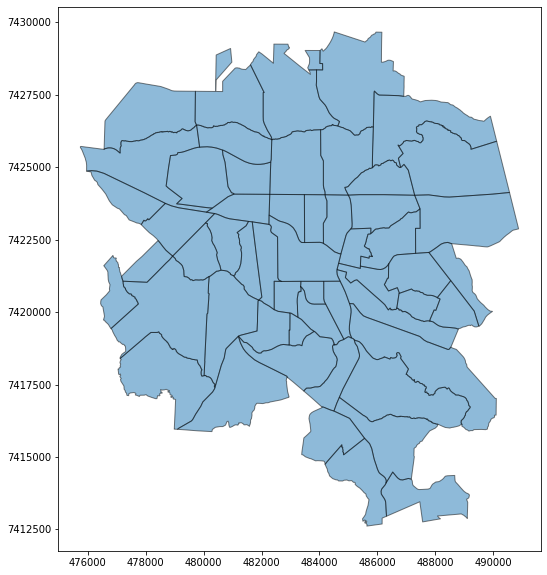

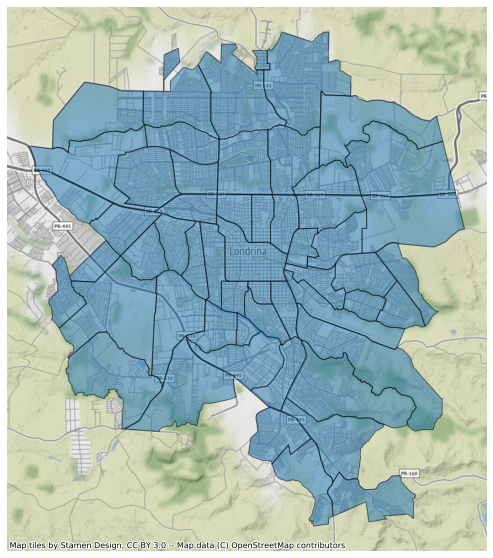

In [36]:
df = londrina.to_crs(epsg=3857)
#base = glista.plot()

ax = londrina.plot(figsize=(10, 10), alpha=0.5, edgecolor='k')

#df.plot( color='red', markersize=5);
ax = df.plot(figsize=(10, 10), alpha=0.5, edgecolor='k')

ctx.add_basemap(ax)
ax.set_axis_off()
plt.savefig('teste.png')
plt.show()


In [1]:
ax = glista.plot(figsize=(10, 10), alpha=0.5, edgecolor='k')
glista.crs = {'init' :'epsg:4326'}
df = glista.to_crs(epsg=3857)
base = glista.plot()
df.plot(ax=base, color='red', markersize=5);
ax = df.plot(figsize=(10, 10), alpha=0.8, edgecolor='k')

ctx.add_basemap(ax)

NameError: name 'glista' is not defined